# Load predictive performance results and make a plot

In [1]:
import matplotlib.pyplot as plt
import pickle
import numpy as np
import os
import torch
os.chdir('src/flatland/flat_game/')
import time
import torch.nn as nn
import torch.nn.functional as F
import math
from env import Env

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html
Loading chipmunk for Linux (64bit) [/home/william/.local/lib/python3.6/site-packages/pymunk/libchipmunk.so]


In [2]:
up_to = 500

our_results = []
reg_results = []
ssm_results = []
direct_results = []

for subdir, dirs, files in os.walk('results/'):

    if 'ourmethod_noreg' in subdir:
        scores = pickle.load(open(subdir + '/scores.pkl','rb'))[:up_to]
        our_results.append(scores)
        
    if 'ourmethod_reg' in subdir:
        scores = pickle.load(open(subdir + '/scores.pkl','rb'))[:up_to]
        reg_results.append(scores)

    if 'direct_' in subdir:
        scores = pickle.load(open(subdir + '/scores.pkl','rb'))[:up_to]
        direct_results.append(scores)

our_results = torch.stack(our_results)
reg_results = torch.stack(reg_results)
#ssm_results = torch.stack(ssm_results)
direct_results = torch.stack(direct_results)

Text(0, 0.5, 'Prediction Error')

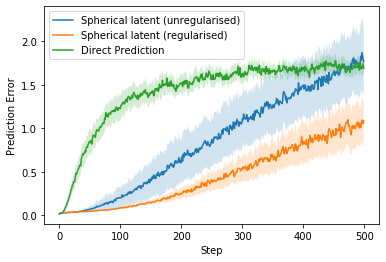

In [4]:
plt.plot(our_results.mean(axis=0), label='Spherical latent (unregularised)')
plt.fill_between(
    list(range(our_results.shape[1])),
    our_results.mean(axis=0) - 1.96 * our_results.std(axis=0)/np.sqrt(our_results.shape[0]),
    our_results.mean(axis=0) + 1.96 * our_results.std(axis=0)/np.sqrt(our_results.shape[0]),
    alpha=0.2)

plt.plot(reg_results.mean(axis=0), label='Spherical latent (regularised)')
plt.fill_between(
    list(range(our_results.shape[1])),
    reg_results.mean(axis=0) - 1.96 * reg_results.std(axis=0)/np.sqrt(reg_results.shape[0]),
    reg_results.mean(axis=0) + 1.96 * reg_results.std(axis=0)/np.sqrt(reg_results.shape[0]),
    alpha=0.2)

plt.plot(direct_results.mean(axis=0), label='Direct Prediction')
plt.fill_between(
    list(range(direct_results.shape[1])),
    direct_results.mean(axis=0) - 1.96 * direct_results.std(axis=0)/np.sqrt(direct_results.shape[0]),
    direct_results.mean(axis=0) + 1.96 * direct_results.std(axis=0)/np.sqrt(direct_results.shape[0]),
    alpha=0.2)

plt.legend()
plt.xlabel('Step')
plt.ylabel('Prediction Error')